In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

In [6]:
pd.DataFrame(X)[0]

0     -2.315330
1      0.391158
2     -0.259294
3     -1.586817
4     -0.490032
         ...   
995   -0.987018
996   -1.038742
997   -1.276528
998   -0.835421
999   -0.336691
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

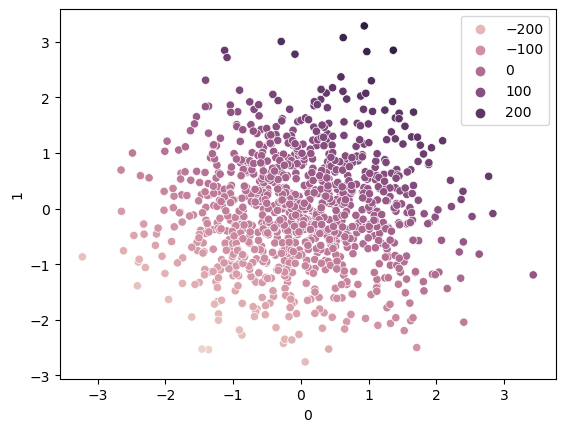

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[47.33560033, 76.69698242]])

In [13]:
y_pred = svr.predict(X_test)

In [14]:
y_pred

array([ -71.72093175, -100.82674426, -121.9791096 , -215.69260707,
       -100.2298004 ,  -63.19822121,   27.52072371, -102.88556593,
         81.45197425,  -33.11212714, -101.07729881,   13.68358262,
        -36.61404298,   57.36229473,   13.76724441,  -34.39321635,
         74.16173605,   52.26821222,  130.09036257,   42.19005457,
        -38.62053528,   56.88262608,  -55.13686725,   89.35075375,
         32.52318434,   72.24544506,   52.26209193, -153.75454609,
         14.11064209, -135.31297358,   -8.89583778,   57.28772398,
        -18.35622643,   49.44764791,  -27.78339631, -115.79197375,
         79.59825202,   -8.20075815,  -16.97169148,   -5.40707078,
        -38.80696891,  114.34299719,   27.79999705,   34.42262518,
         98.28537621,   -1.72214209, -217.83070279, -111.54933737,
         37.42002101,   77.07367466,   38.36882281,    8.2776934 ,
        -15.59844904,   14.71906166,   -5.16068789,   -7.93856919,
        -11.07802991,   39.07192651,   39.58247106,   86.98063

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9987542604052531


# Hyperparameters Tuning with SVC

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['linear'],
            'epsilon' : [0.1,0.2,0.3]
             }

In [18]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.758 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.758 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.776 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
y_pred4 = grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9987959017286984


TypeError: 'SVR' object is not iterable

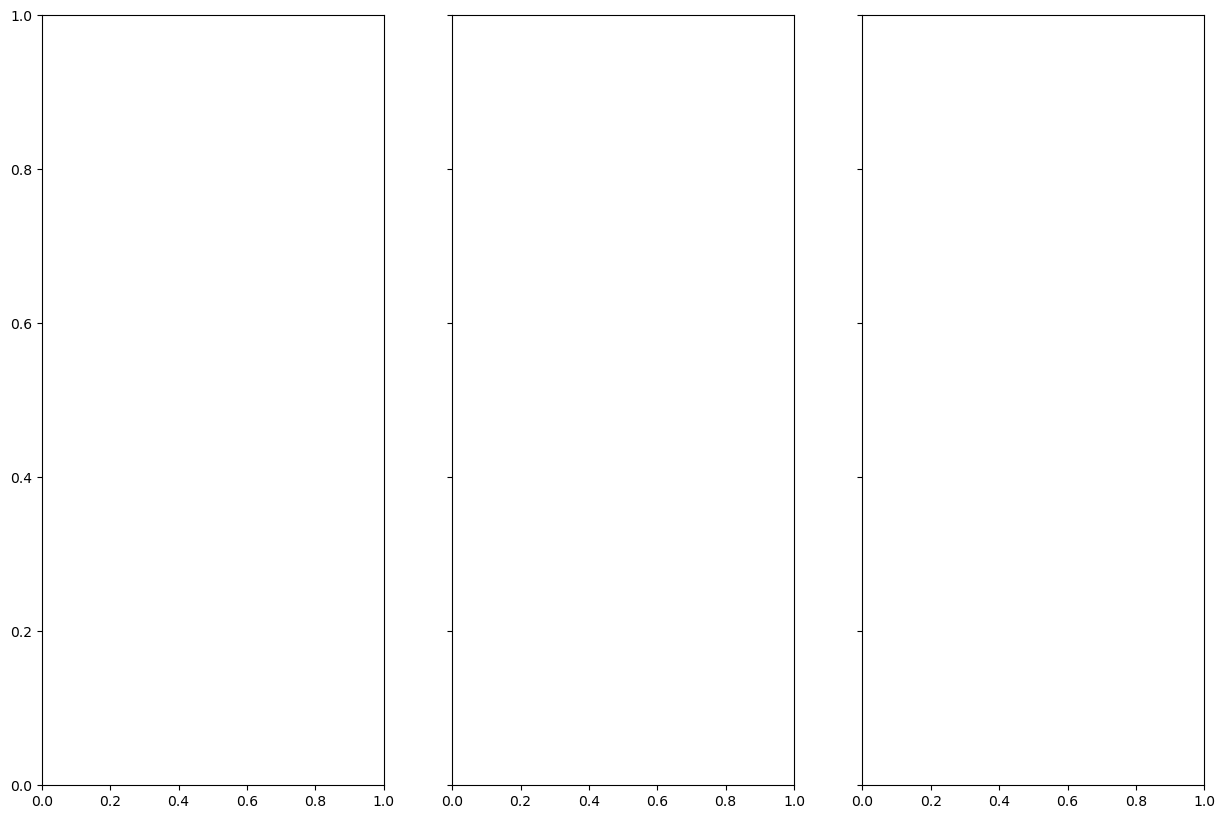

In [22]:
lw = 4


kernel_label = ["Linear"]
model_color = ["g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svr):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()